# Byte Pair Encoding (BPE)

El algoritmo de BPE se enfoca en encontrar subcadenas (subwords) dentro de palabras. El objetivo es buscar subcadenas que permitan codificar las palabras. De esta forma, propone nuevos símbolos (correspondientes a las subcadenas) que reduzcan la entropía del sistema.

In [1]:
from __future__ import division
from collections import defaultdict, Counter
from itertools import chain
from re import escape, compile
import matplotlib.pyplot as plt
import numpy as np

El algoritmo de BPE suele trabajar con un vocabulario de palabras. En este caso $\Sigma$ son los símbolos de caracteres. Podemos hacer un diccionario con estos símbolos dentro de las palabras y sus frecuencias.

In [2]:
#Palabras para analizar
strings = 'gato gata gatos gatas gatitos gatitas niño niña niños niñas niñitos niñitas lobo loba lobos lobas lobitos lobitas '
strings += 'ventana ventanas ventanitas rojo roja rojito rojita rojitos rojitas lobito lobita niñito niñita gatito gatita reto retos'

#Se crea el diccionario: 
#Los simbolos del alfabeto se separan por un símbolo especial
#Se asocian las frecuencias
words = Counter([' '.join(list(w)) for w in strings.split()])

print(words)

Counter({'g a t o': 1, 'g a t a': 1, 'g a t o s': 1, 'g a t a s': 1, 'g a t i t o s': 1, 'g a t i t a s': 1, 'n i ñ o': 1, 'n i ñ a': 1, 'n i ñ o s': 1, 'n i ñ a s': 1, 'n i ñ i t o s': 1, 'n i ñ i t a s': 1, 'l o b o': 1, 'l o b a': 1, 'l o b o s': 1, 'l o b a s': 1, 'l o b i t o s': 1, 'l o b i t a s': 1, 'v e n t a n a': 1, 'v e n t a n a s': 1, 'v e n t a n i t a s': 1, 'r o j o': 1, 'r o j a': 1, 'r o j i t o': 1, 'r o j i t a': 1, 'r o j i t o s': 1, 'r o j i t a s': 1, 'l o b i t o': 1, 'l o b i t a': 1, 'n i ñ i t o': 1, 'n i ñ i t a': 1, 'g a t i t o': 1, 'g a t i t a': 1, 'r e t o': 1, 'r e t o s': 1})


A continuación obtenemos la frecuencia de los pares de símbolos. Con base en el diccionario que hemos formado, tomamos todos los pares posibles de símbolos y sumamos la frecuencia de cada aparición. Así, obtenemos las frecuencias de los pares de caracteres.

In [3]:
#Determina las estadisticas (frecuencia) de las subwords
def get_stats(voc):
    #Diccionario tipo defaultdict
    pairs = defaultdict(int)

    for word, freq in voc.items():
        #Separa la palabra por caracteres
        chars = word.split(' ')
        #
        for i in range(len(chars)-1):
            #Toma el caracter i y el i+1 y aumenta su freq
            pairs[chars[i], chars[i+1]] += freq

    return pairs

stats1 = get_stats(words)
print(stats1)

defaultdict(<class 'int'>, {('g', 'a'): 8, ('a', 't'): 8, ('t', 'o'): 12, ('t', 'a'): 14, ('o', 's'): 8, ('a', 's'): 9, ('t', 'i'): 4, ('i', 't'): 17, ('n', 'i'): 9, ('i', 'ñ'): 8, ('ñ', 'o'): 2, ('ñ', 'a'): 2, ('ñ', 'i'): 4, ('l', 'o'): 8, ('o', 'b'): 8, ('b', 'o'): 2, ('b', 'a'): 2, ('b', 'i'): 4, ('v', 'e'): 3, ('e', 'n'): 3, ('n', 't'): 3, ('a', 'n'): 3, ('n', 'a'): 2, ('r', 'o'): 6, ('o', 'j'): 6, ('j', 'o'): 1, ('j', 'a'): 1, ('j', 'i'): 4, ('r', 'e'): 2, ('e', 't'): 2})


Definimos una función que tome el patrón más frecuente $\max (a,b)$ y lo convierte en un símbolo. Esto es, se realiza el cambio:

$$(a,b) \mapsto ab$$

Posteriormente, sustituye este patrón cada vez que lo encuentra en el vocabulario.

In [4]:
#Junta los patrones más frecuentes
def merge_voc(pair,voc_in):
    #Output vocabulary
    voc_out ={}
    #Escapa el patrón de mayor frecuencia
    bigram = escape(' '.join(pair))
    #Regex para buscar dentro de la palabra
    pattern = compile(r'(?<!\S)' + bigram + r'(?!\S)')

    for word in voc_in:
        #('a', 'b') --> 'ab'
        w_out = pattern.sub(''.join(pair), word)
        #Define un nuevo vocabulario con el nuevo símbolo ab
        voc_out[w_out] = voc_in[word]

    return voc_out

#Busca el patrón más frecuente
max_freq = max(stats1, key=stats1.get)
print(max_freq)
print(merge_voc(max_freq,words))

('i', 't')
{'g a t o': 1, 'g a t a': 1, 'g a t o s': 1, 'g a t a s': 1, 'g a t it o s': 1, 'g a t it a s': 1, 'n i ñ o': 1, 'n i ñ a': 1, 'n i ñ o s': 1, 'n i ñ a s': 1, 'n i ñ it o s': 1, 'n i ñ it a s': 1, 'l o b o': 1, 'l o b a': 1, 'l o b o s': 1, 'l o b a s': 1, 'l o b it o s': 1, 'l o b it a s': 1, 'v e n t a n a': 1, 'v e n t a n a s': 1, 'v e n t a n it a s': 1, 'r o j o': 1, 'r o j a': 1, 'r o j it o': 1, 'r o j it a': 1, 'r o j it o s': 1, 'r o j it a s': 1, 'l o b it o': 1, 'l o b it a': 1, 'n i ñ it o': 1, 'n i ñ it a': 1, 'g a t it o': 1, 'g a t it a': 1, 'r e t o': 1, 'r e t o s': 1}


Podemos iterar el proceso varias veces para obtener subcadenas más largas.

In [5]:
its = 4

new_words = words
for j in range(its):
    #Obtiene los pares y frecuencias
    pair = get_stats(new_words)
    #Condición de paro
    try:
        #max(a,b)
        best = max(pair, key=pair.get)
        #Sustituye (a,b) por ab al vocabulario
        new_words = merge_voc(best,  new_words)
    #Se detiene cuando merge toda palabra
    except:
        break
    
    print('Patron mas frecuente:', ''.join(best), 'frecuencia:',pair[best])

Patron mas frecuente: it frecuencia: 17
Patron mas frecuente: as frecuencia: 9
Patron mas frecuente: ga frecuencia: 8
Patron mas frecuente: gat frecuencia: 8


In [6]:
for w in new_words.keys():
    print(w)

gat o
gat a
gat o s
gat as
gat it o s
gat it as
n i ñ o
n i ñ a
n i ñ o s
n i ñ as
n i ñ it o s
n i ñ it as
l o b o
l o b a
l o b o s
l o b as
l o b it o s
l o b it as
v e n t a n a
v e n t a n as
v e n t a n it as
r o j o
r o j a
r o j it o
r o j it a
r o j it o s
r o j it as
l o b it o
l o b it a
n i ñ it o
n i ñ it a
gat it o
gat it a
r e t o
r e t o s


### Estimación de entropía

Cuando los símbolos que se utilizan para codificar el lenguaje humano se agrupan en símbolos que codifican de manera más eficiente el lenguaje, se esperaría que la entropía del lenguaje disminuyera. Por tanto, podemos estimar la probabilidad de cada codificación. Para esto, utilizamos una entropía empírica determinada por la probabilidad de los símbolos:

$$H(X) = -\frac{1}{N} \sum_{x} \ln p(x)$$

Donde $x$ es un símbolo en una iteración dada. Así, en la primera iteración se calculará la entropía a nivel caracter, pero en las siguientes iteraciones se tomarán simbolos afijales.

In [7]:
def get_entropy(voc):
    #Frecuencia de cada símbolo en el vocabulario
    fr = list( chain(*[[(c,f) for c in w.split(' ')] for w,f in voc.items()]) ) #list(get_stats(voc).values()))
    freq = defaultdict(int)
    for w,f in fr:
        freq[w] += f
    freq = np.array(list(freq.values()))
    #Probabilidad de los símbolos
    p = freq/freq.sum()
    #Entropía del vocabulario
    H = (-(1./len(p))*np.log(p)).sum() 
    
    return H

Al calcular la entropía de los caracteres vemos que está es la más alta.

In [8]:
get_entropy(words)

2.884699917019258

Ahora, podemos ver cómmo se comporta la entropía a través de los agrupamientos que se hace en cada iteración.

In [9]:
its = 22

#Valores para visualizar
h_plot = np.zeros(its)

words1 = words
for j in range(its):
    #Obtiene los pares y frecuencias
    pair = get_stats(words1)
    #Condición de paro
    try:
        #max(a,b)
        best = max(pair, key=pair.get)
        #Sustituye (a,b) por ab al vocabulario
        words1 = merge_voc(best, words1)
        h_plot[j] = get_entropy(words1)
    #Se detiene cuando merge toda palabra
    except:
        break
    
    print('Patron mas frecuente:', ''.join(best), 'frecuencia:',pair[best])

Patron mas frecuente: it frecuencia: 17
Patron mas frecuente: as frecuencia: 9
Patron mas frecuente: ga frecuencia: 8
Patron mas frecuente: gat frecuencia: 8
Patron mas frecuente: os frecuencia: 8
Patron mas frecuente: ni frecuencia: 8
Patron mas frecuente: niñ frecuencia: 8
Patron mas frecuente: lo frecuencia: 8
Patron mas frecuente: lob frecuencia: 8
Patron mas frecuente: ro frecuencia: 6
Patron mas frecuente: roj frecuencia: 6
Patron mas frecuente: itas frecuencia: 5
Patron mas frecuente: itos frecuencia: 4
Patron mas frecuente: ito frecuencia: 4
Patron mas frecuente: ita frecuencia: 4
Patron mas frecuente: ve frecuencia: 3
Patron mas frecuente: ven frecuencia: 3
Patron mas frecuente: vent frecuencia: 3
Patron mas frecuente: venta frecuencia: 3
Patron mas frecuente: ventan frecuencia: 3
Patron mas frecuente: re frecuencia: 2
Patron mas frecuente: ret frecuencia: 2


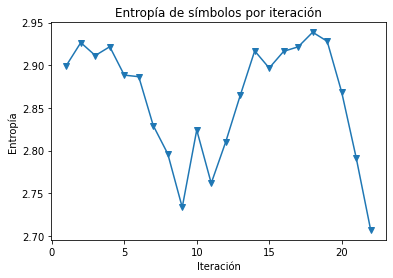

In [10]:
#Visualización
plt.plot(range(1,its+1), h_plot,'-v')
plt.xlabel('Iteración')
plt.ylabel('Entropía')
plt.title('Entropía de símbolos por iteración')
plt.show()

In [11]:
for w in words1.keys():
    print(w)

gat o
gat a
gat os
gat as
gat itos
gat itas
niñ o
niñ a
niñ os
niñ as
niñ itos
niñ itas
lob o
lob a
lob os
lob as
lob itos
lob itas
ventan a
ventan as
ventan itas
roj o
roj a
roj ito
roj ita
roj itos
roj itas
lob ito
lob ita
niñ ito
niñ ita
gat ito
gat ita
ret o
ret os
